In [55]:
import logging
import torch
import numpy as np
import matplotlib.pyplot as plt

In [56]:
from utils.data import load_embeddings
dataset = 'mean0'
dim='2'
data =load_embeddings(dataset, dim)
poincare_data = torch.from_numpy(data).type(torch.DoubleTensor)
n_samples,high_dim = poincare_data.shape

In [57]:
from geomstats.geometry.hyperboloid import Hyperboloid
from geomstats.geometry.poincare_ball import PoincareBall

high_geom_hyperboloid = Hyperboloid(dim=high_dim)
high_geom_poincare = PoincareBall(dim=high_dim)
hyperboloid_data = high_geom_hyperboloid.change_coordinates_system(poincare_data,'ball','extrinsic')

In [58]:
from NHDR import NestedHyperboloid
error_nested, X_low,X_proj= NestedHyperboloid(hyperboloid_data, 2, verbosity=1)
print(error_nested)

Terminated - min grad norm reached after 7 iterations, 0.56 seconds.

tensor(0.0049, dtype=torch.float64)


In [59]:
poincare_nested = Hyperboloid.change_coordinates_system(X_proj,'extrinsic','ball')
poincare_low = Hyperboloid.change_coordinates_system(X_low,'extrinsic','ball')

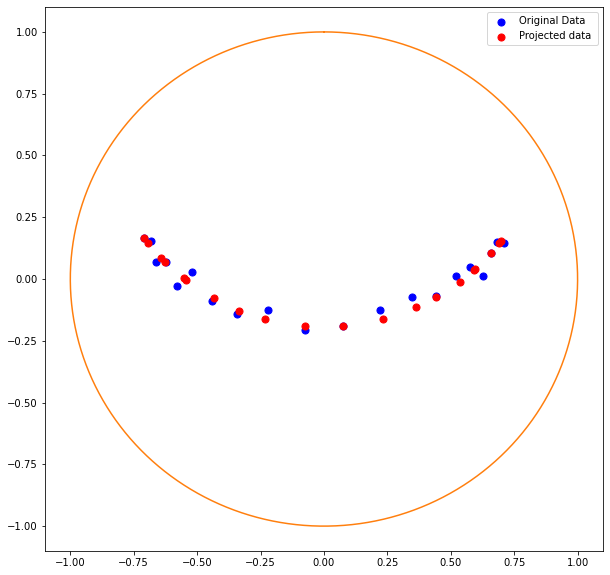

In [60]:
# projected data
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
pho = np.linspace(0.0,2.0*np.pi,num=200,endpoint=True)
xx = np.sin(pho)
yy = np.cos(pho)
ax.plot(xx,yy, color="C1")
ax.scatter(poincare_data[:,0], poincare_data[:,1],color='blue', label = 'Original Data',s = 50)
ax.scatter(poincare_nested[:,0], poincare_nested[:,1],color='red', label = 'Projected data ',s = 50)

ax.legend(loc=1)

In [61]:
# Comparision of other methods
from utils.data import load_precomputed_projection
poincare_horopca = load_precomputed_projection(dataset,'horopca','1')
poincare_tpca = load_precomputed_projection(dataset,'tpca','1')
poincare_pga = load_precomputed_projection(dataset,'pga','1')

In [62]:
from utils.metrics import projection_error
error_horopca = projection_error(high_geom_poincare,poincare_data, torch.from_numpy(poincare_horopca))
error_tpca = projection_error(high_geom_poincare,poincare_data, torch.from_numpy(poincare_tpca))
error_pga = projection_error(high_geom_poincare,poincare_data, torch.from_numpy(poincare_pga))
logging.info("projection error for horopca is \t{:.4f}".format(error_horopca))
logging.info("projection error for tpca is \t{:.4f}".format(error_tpca))
logging.info("projection error for pga is \t{:.4f}".format(error_pga))
logging.info("projection error for NH is \t{:.4f}".format(error_nested))

INFO: projection error for horopca is 	0.1816
INFO: projection error for tpca is 	0.1202
INFO: projection error for pga is 	0.1638
INFO: projection error for NH is 	0.0049


In [63]:
# Check mean zero
from utils.metrics import FM
poincare_fm = FM(high_geom_poincare,poincare_data)
print(poincare_fm)

tensor([3.2496e-04, 2.7014e-08])


(-1.099965731583572, 1.099965731583572, -1.09986915899354, 1.0999937694758828)

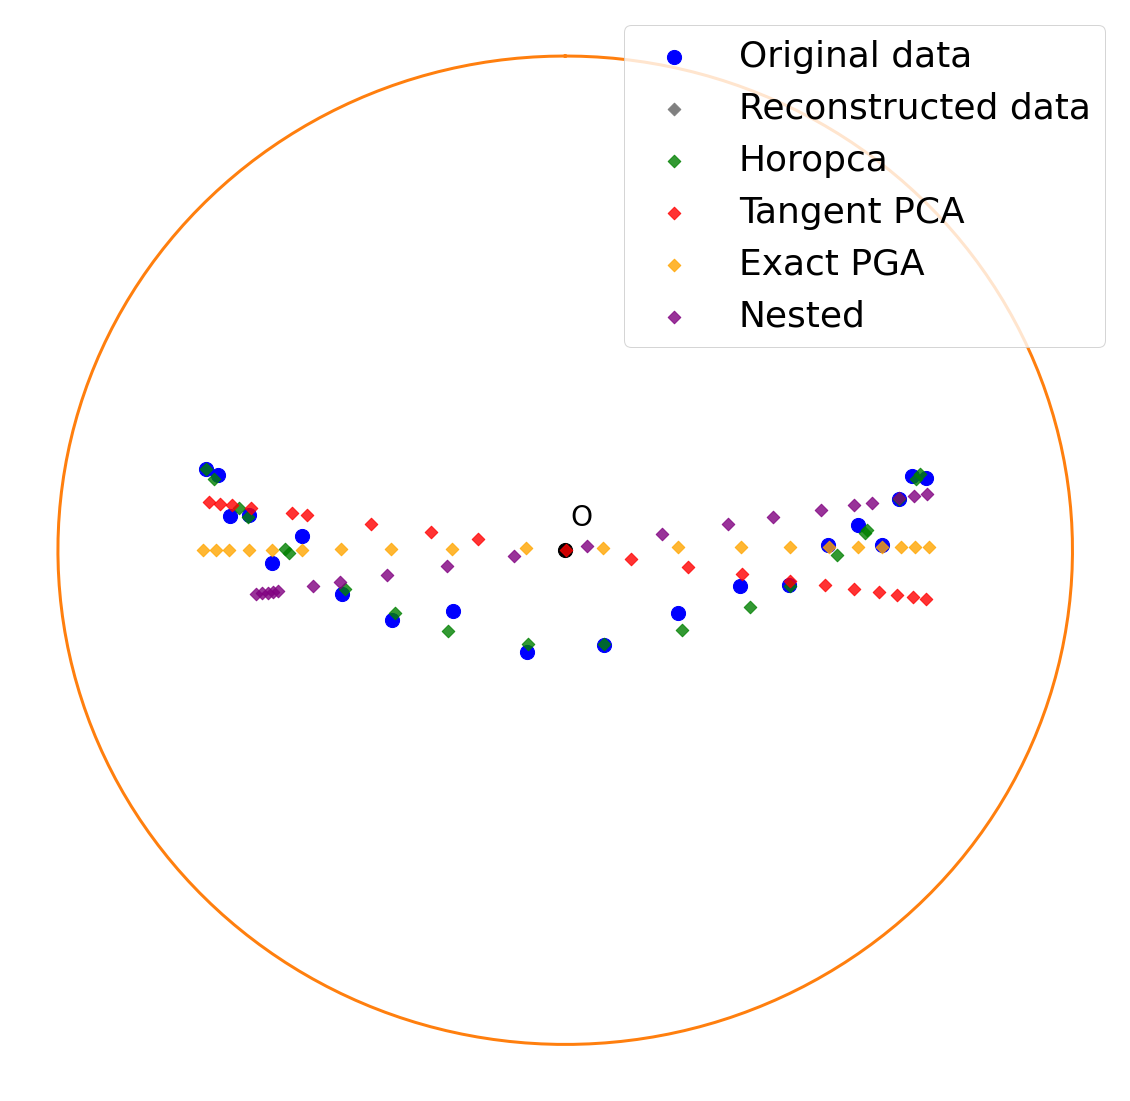

In [64]:
#plot
%matplotlib inline
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot()
pho = np.linspace(0.0,2.0*np.pi,num=200,endpoint=True)
xx = np.sin(pho)
yy = np.cos(pho)
ax.plot(xx,yy, color="C1",linewidth=3)
ax.scatter(poincare_data[:,0], poincare_data[:,1], color = 'b', label = 'Original data',alpha=1, s =200)


ax.scatter(poincare_fm[0], poincare_fm[1], color = 'gray',s=80,marker='D',alpha= 1,label = 'Reconstructed data') #0.1638

ax.scatter(poincare_fm[0], poincare_fm[1],color='black',s = 200)
plt.text(0.01, 0.05, 'O',fontsize = 28)
ax.scatter(poincare_nested[:,0], poincare_nested[:,1], color = 'g',s=80,marker='D',alpha = 0.8,label = 'Horopca') 
ax.scatter(poincare_horopca[:,0], poincare_horopca[:,1], color = 'r',s=80,marker='D',alpha = 0.8,label = 'Tangent PCA') 
ax.scatter(poincare_tpca[:,0], poincare_tpca[:,1], color = 'orange',s=80,marker='D',alpha = 0.8,label = 'Exact PGA ') 
ax.scatter(poincare_pga[:,0], poincare_pga[:,1], color = 'purple',s=80,marker='D',alpha = 0.8,label = 'Nested') 


ax.legend(loc=1,prop={'size': 36})
plt.axis('off')